In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from nltk import word_tokenize

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split

In [3]:
path = 'SMSSpamCollection'

In [4]:
messages = pandas.read_csv(path, sep='\t', names=["label", "message"])

In [5]:
print(messages.groupby('label').describe())

                                                        message
label                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4


Спама почти в 7 раз меньше, это значит, что выборка несбалансированная. 

In [6]:
len(messages)

5572

In [7]:
dummy = np.array(['ham']*len(messages))

In [8]:
dummy

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], 
      dtype='<U3')

In [9]:
print(classification_report(dummy, messages['label']))

             precision    recall  f1-score   support

        ham       1.00      0.87      0.93      5572
       spam       0.00      0.00      0.00         0

avg / total       1.00      0.87      0.93      5572



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Как видно, dummy-классификатор по факту ничего не делает, но при этом очень редко ошибается. ~~Прямо как я.~~ Это всё потому, что выборка несбалансированная, и если классификатор просто даёт самый популярный ответ, получается уже хорошо. Для реальной жизни такое, конечно, не подходит -- зачем нам алгоритм выявления спама, который не выявляет спам?

In [10]:
balanced_messages = messages[messages['label'] == 'spam']

In [11]:
bm2 = messages[messages['label'] == 'ham'][::7]

In [12]:
balanced_messages = pandas.concat([balanced_messages, bm2])

In [13]:
balanced_messages

,label,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
12,spam,URGENT! You have won a 1 week FREE membership ...
15,spam,"XXXMobileMovieClub: To use your credit, click ..."
19,spam,England v Macedonia - dont miss the goals/team...
34,spam,Thanks for your subscription to Ringtone UK yo...
42,spam,07732584351 - Rodger Burns - MSG = We tried to...


In [14]:
print(balanced_messages.groupby('label').describe())

                                                        message
label                                                          
ham   count                                                 690
      unique                                                678
      top                                Sorry, I'll call later
      freq                                                    5
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4


Вот, теперь норм и всего примерно поровну. Ура.

In [15]:
bow1 = CountVectorizer()
bow1.fit_transform(balanced_messages['message'])

<1437x4429 sparse matrix of type '<class 'numpy.int64'>'
	with 24887 stored elements in Compressed Sparse Row format>

In [16]:
bowed_messages = bow1.transform(balanced_messages['message'])
naive_model = MultinomialNB()
naive_model.fit(bowed_messages, balanced_messages['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
cv_results = cross_val_score(naive_model, bowed_messages, balanced_messages['label'], cv=10, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.958945221445 0.00787427012284


Это были дефолтные параметры токенизации и всего остального.

In [18]:
bow2 = CountVectorizer(token_pattern=r"(?u)\b\w\w+\b|!|\?|\"|\'|,")
bow2.fit_transform(balanced_messages['message'])

<1437x4434 sparse matrix of type '<class 'numpy.int64'>'
	with 26312 stored elements in Compressed Sparse Row format>

In [19]:
bowed_messages = bow2.transform(balanced_messages['message'])
naive_model = MultinomialNB()
naive_model.fit(bowed_messages, balanced_messages['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
cv_results = cross_val_score(naive_model, bowed_messages, balanced_messages['label'], cv=10, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.958954933955 0.008977895355


Это была модель, которая смотрит на знаки препинания как на отдельные токены. Практически никакой разницы с предыдущей.

In [21]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

In [24]:
bow3 = CountVectorizer(tokenizer = tokenize)
bow3.fit_transform(balanced_messages['message'])

<1437x4351 sparse matrix of type '<class 'numpy.int64'>'
	with 28957 stored elements in Compressed Sparse Row format>

In [25]:
bowed_messages = bow3.transform(balanced_messages['message'])
naive_model = MultinomialNB()
naive_model.fit(bowed_messages, balanced_messages['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
cv_results = cross_val_score(naive_model, bowed_messages, balanced_messages['label'], cv=10, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.956871600622 0.0106117880617


Это была модель со стеммингом. Со стеммингом чуть хуже.

In [27]:
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [28]:
bow4 = CountVectorizer(tokenizer=LemmaTokenizer())
bow4.fit_transform(balanced_messages['message'])

<1437x4626 sparse matrix of type '<class 'numpy.int64'>'
	with 28974 stored elements in Compressed Sparse Row format>

In [30]:
bowed_messages = bow4.transform(balanced_messages['message'])
naive_model = MultinomialNB()
naive_model.fit(bowed_messages, balanced_messages['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
cv_results = cross_val_score(naive_model, bowed_messages, balanced_messages['label'], cv=10, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.952695221445 0.0114831781104


Это была модель с лемматизацией. С лемматизацией ещё немножко хуже.

In [32]:
bow5 = CountVectorizer(stop_words='english')
bow5.fit_transform(balanced_messages['message'])

<1437x4209 sparse matrix of type '<class 'numpy.int64'>'
	with 16026 stored elements in Compressed Sparse Row format>

In [33]:
bowed_messages = bow5.transform(balanced_messages['message'])
naive_model = MultinomialNB()
naive_model.fit(bowed_messages, balanced_messages['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
cv_results = cross_val_score(naive_model, bowed_messages, balanced_messages['label'], cv=10, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.950597319347 0.0143937960321


Со стоп-словами ещё чуть хуже.

In [35]:
bow6 = CountVectorizer(max_df=.25)
bow6.fit_transform(balanced_messages['message'])

<1437x4426 sparse matrix of type '<class 'numpy.int64'>'
	with 23444 stored elements in Compressed Sparse Row format>

In [36]:
bowed_messages = bow6.transform(balanced_messages['message'])
naive_model = MultinomialNB()
naive_model.fit(bowed_messages, balanced_messages['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
cv_results = cross_val_score(naive_model, bowed_messages, balanced_messages['label'], cv=10, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.95963966589 0.00747325239885


Ограничение сверху на частотность даёт незначительный прирост к точности. Ограничения снизу либо не влияют, либо уменьшают точность (поэтому я их убрала).

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
bow7 = TfidfVectorizer()
bow7.fit_transform(balanced_messages['message'])

<1437x4429 sparse matrix of type '<class 'numpy.float64'>'
	with 24887 stored elements in Compressed Sparse Row format>

In [39]:
bowed_messages = bow7.transform(balanced_messages['message'])
naive_model = MultinomialNB()
naive_model.fit(bowed_messages, balanced_messages['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [40]:
cv_results = cross_val_score(naive_model, bowed_messages, balanced_messages['label'], cv=10, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.961742424242 0.0112738309489


TfidfVectorizer ещё немножко лучше работает.

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bowed_messages, balanced_messages['label'], test_size=0.33)
naive_model = MultinomialNB()
naive_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
print(classification_report(naive_model.predict(X_test), y_test))

             precision    recall  f1-score   support

        ham       0.95      0.96      0.95       230
       spam       0.96      0.96      0.96       245

avg / total       0.96      0.96      0.96       475



In [43]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier()
treeclf.fit(bowed_messages, balanced_messages['label'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [44]:
cv_results2 = cross_val_score(treeclf, bowed_messages, balanced_messages['label'], cv=10, scoring='accuracy')
print(cv_results2.mean(), cv_results2.std())

0.912276612277 0.0245170487719


Дерево хуже работает.

In [45]:
treeclf = DecisionTreeClassifier()
treeclf.fit(X_train, y_train)
print(classification_report(treeclf.predict(X_test), y_test))

             precision    recall  f1-score   support

        ham       0.91      0.92      0.92       230
       spam       0.92      0.92      0.92       245

avg / total       0.92      0.92      0.92       475



In [46]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(bowed_messages, balanced_messages['label'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [47]:
cv_results3 = cross_val_score(forest, bowed_messages, balanced_messages['label'], cv=10, scoring='accuracy')
print(cv_results3.mean(), cv_results3.std())

0.935984848485 0.0186209962689


Лучше дерева, хуже байеса.

In [48]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
print(classification_report(forest.predict(X_test), y_test))

             precision    recall  f1-score   support

        ham       0.98      0.89      0.94       254
       spam       0.89      0.98      0.93       221

avg / total       0.94      0.93      0.93       475



In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

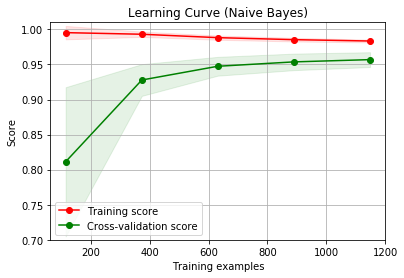

In [50]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X, y = bowed_messages, balanced_messages['label']


title = "Learning Curve (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = naive_model
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

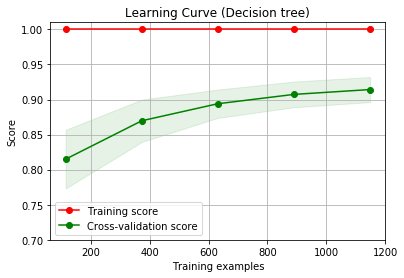

In [51]:
title = "Learning Curve (Decision tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = treeclf
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

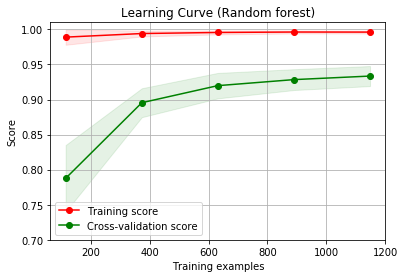

In [52]:
title = "Learning Curve (Random forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = forest
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

Вроде бы для дерева и леса, судя по кривым обучения, помогло бы наращивать выборку (а для байеса -- нет).

In [53]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp

In [54]:
def plotroc(classifier):
    X, y = bowed_messages, balanced_messages['label']
    y = label_binarize(y, classes=['spam', 'ham'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
    classifier.fit(X_train, y_train)
    y_train_predictions = classifier.predict(X_train)
    y_test_predictions = classifier.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
    count = 1
    color = colorSet[count-1]
    count+=1

        # Plotting
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate, c=color, label=('AUC-'+'= %0.2f'%roc_auc))
    plt.legend(loc='lower right', prop={'size':8})
    plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
    plt.xlim([-0.05,1.0])
    plt.ylim([0.0,1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


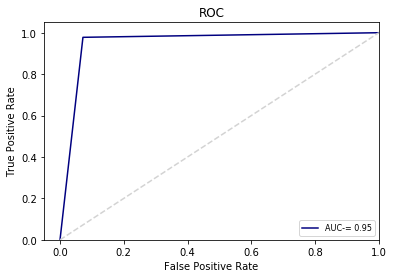

In [55]:
plotroc(naive_model)

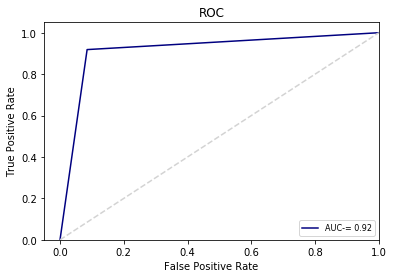

In [56]:
plotroc(treeclf)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


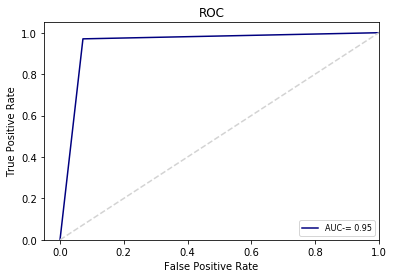

In [57]:
plotroc(forest)

Судя по roc-кривым, лучше всего лес, потом байес, потом дерево.

In [58]:
balanced_messages['length'] = balanced_messages['message'].map(lambda text: len(text))

In [59]:
balanced_messages.head()

,label,message,length
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136


In [60]:
def excl(text):
    c = 0
    for i in text:
        if i=='!':
            c+=1
    return c

In [61]:
balanced_messages['exclamation'] = balanced_messages['message'].map(lambda text: excl(text))

In [62]:
def caps(text):
    c = 0
    for i in text.split():
        if i==i.upper():
            c+=1
    return c

In [63]:
balanced_messages['caps'] = balanced_messages['message'].map(lambda text: caps(text))

In [64]:
def makedict(label):
    spamdict = {}
    for i in balanced_messages['message'][balanced_messages['label'] == label]:
        for word in i.lower().split():
            if word not in spamdict:
                spamdict[word] = 1
            else:
                spamdict[word] += 1
    return spamdict
spamdict = makedict('spam')
hamdict = makedict('ham')
spam = set(sorted(spamdict, key=spamdict.get, reverse=True)[:1000])
ham = set(sorted(hamdict, key=hamdict.get, reverse=True)[:5000])

In [65]:
spam = spam-ham
len(spam)

648

In [66]:
def checkwords(text):
    c = 0
    text = text.lower()
    for i in text.split():
        if i in spam:
            c+=1
    return c

In [67]:
balanced_messages['spamwords'] = balanced_messages['message'].map(lambda text: checkwords(text))

In [68]:
balanced_messages['spamrate'] = balanced_messages['message'].map(lambda text: checkwords(text)/len(text.split()))

В качестве спецпризнаков я решила взять длину сообщения, кол-во восклицательных знаков и слов капсом, а также кол-во слов, характерных для спама, но не очень характерных для просто текстов (просто количество и с поправкой на длину сообщения).

In [69]:
X = balanced_messages[['length', 'exclamation', 'caps', 'spamwords', 'spamrate']]
y = balanced_messages['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [70]:
clf = RandomForestClassifier()

In [71]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [72]:
clf.feature_importances_

array([ 0.12546594,  0.00662685,  0.120629  ,  0.56893744,  0.17834077])

Как видно, параметр spamwords (кол-во специфичных для спама слов ,tp на длину сообщения) играет наибольшую роль, c поправкой на длину тоже предсказывает. Количество восклицательных знаков меньше всего влияет на предсказание.

In [73]:
print(classification_report(clf.predict(X_test), y_test))

             precision    recall  f1-score   support

        ham       0.97      0.97      0.97       159
       spam       0.97      0.97      0.97       129

avg / total       0.97      0.97      0.97       288



In [74]:
cv_results = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.965175796426 0.0129212421799


Рандомный лес со сгенерированными признаками работает лучше, чем все предыдущие классификаторы.

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


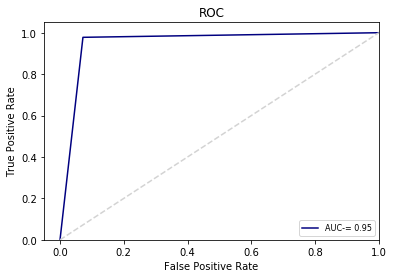

In [75]:
plotroc(clf)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

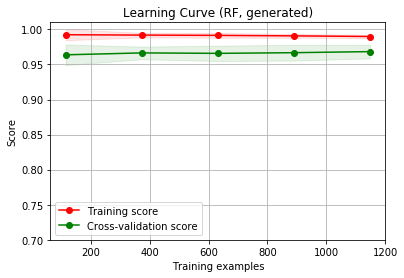

In [76]:
plot_learning_curve(clf, 'Learning Curve (RF, generated)', X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=6)

Ну, такое. Добавить ещё примеров, кажется, не сильно поможет. ROC-кривая симпатичная -- в смысле, площадь под кривой большая, это хорошо, это значит, что кол-во FP растёт медленнее кол-ва TP.